# Exercise 1 

In [55]:
# Makeover 

# The given code creates a graph that looks like this 


import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df = duckdb.query("""SELECT avg_CO2, import,quantity, year, month FROM df""").df()
df

,Avg_CO2,Import,Quantity,Year,Month
0,152,2276,12685,2007,1
1,156,1992,9793,2007,2
2,159,2626,11264,2007,3
3,160,2220,8854,2007,4
4,160,2881,12007,2007,5
...,...,...,...,...,...
116,88,1526,13854,2016,9
117,91,1365,11932,2016,10
118,88,1305,13194,2016,11
119,98,1137,13602,2016,12


<Axes: xlabel='date'>

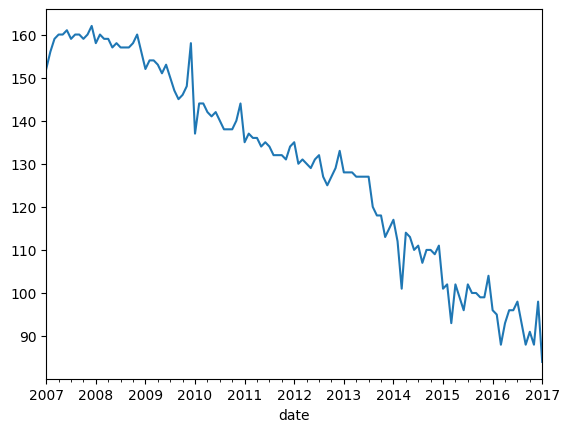

In [56]:
df["date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m")

df = df.set_index("date")

df["Avg_CO2"].plot()

In [57]:
df["Avg_CO2"].values

array([152, 156, 159, 160, 160, 161, 159, 160, 160, 159, 160, 162, 158,
       160, 159, 159, 157, 158, 157, 157, 157, 158, 160, 156, 152, 154,
       154, 153, 151, 153, 150, 147, 145, 146, 148, 158, 137, 144, 144,
       142, 141, 142, 140, 138, 138, 138, 140, 144, 135, 137, 136, 136,
       134, 135, 134, 132, 132, 132, 131, 134, 135, 130, 131, 130, 129,
       131, 132, 127, 125, 127, 129, 133, 128, 128, 128, 127, 127, 127,
       127, 120, 118, 118, 113, 115, 117, 112, 101, 114, 113, 110, 111,
       107, 110, 110, 109, 111, 101, 102,  93, 102,  99,  96, 102, 100,
       100,  99,  99, 104,  96,  95,  88,  93,  96,  96,  98,  93,  88,
        91,  88,  98,  84])

In [58]:
df["Avg_CO2"].value_counts()

Avg_CO2
160    7
127    6
159    5
158    4
132    4
96     4
157    4
135    3
134    3
110    3
93     3
128    3
131    3
102    3
88     3
99     3
138    3
144    3
136    2
154    2
137    2
153    2
156    2
152    2
100    2
98     2
111    2
101    2
113    2
130    2
118    2
129    2
140    2
142    2
162    1
150    1
147    1
148    1
146    1
161    1
141    1
145    1
151    1
117    1
125    1
133    1
115    1
120    1
112    1
109    1
114    1
107    1
95     1
104    1
91     1
84     1
Name: count, dtype: int64

# Story telling makeover

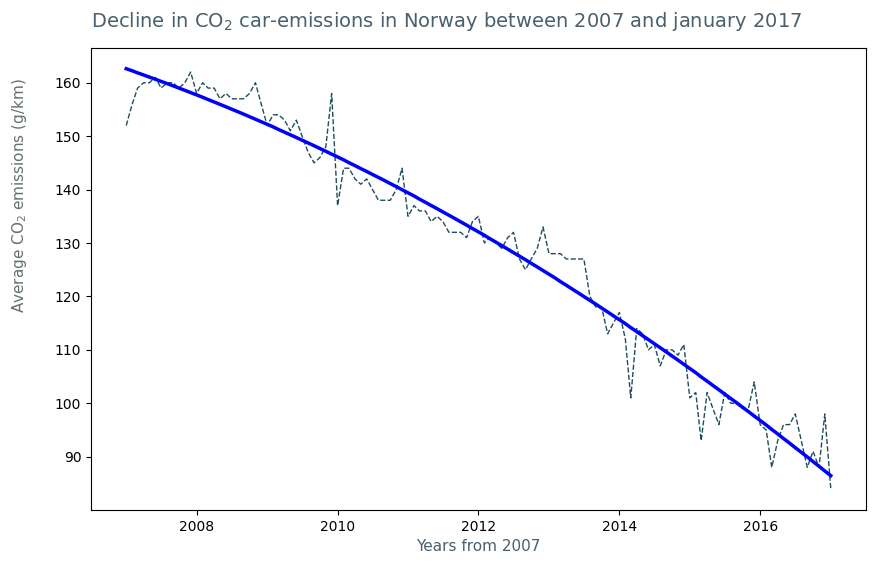

In [ ]:
from constants import GRAY_1, BLUE_1, GRAY_3, GRAY_2
import numpy as np 
import matplotlib.pyplot as plt


x = np.arange(len(df))
y = df["Avg_CO2"].values

colors = [GRAY_1] * len(df["Avg_CO2"])
fig, ax = plt.subplots(figsize=(10, 6))

coeffs = np.polyfit(x, y, deg=2)
trend = np.polyval(coeffs, x)


ax.plot(df.index, y, linewidth=1, linestyle="--", label="Actual data", color=BLUE_1)
ax.plot(df.index, trend, label="Trend line", color="blue", linewidth=2.5)

ax.set_title(r"Decline in $\mathrm{CO_2}$ car-emissions in Norway between 2007 and january 2017", loc="left", fontsize=14, color=GRAY_3, pad=15)
ax.set_xlabel("Years from 2007", color=GRAY_3, fontsize=11, loc="center")
ax.set_ylabel(r"Average $\mathrm{CO_2}$ emissions (g/km)", color=GRAY_2, fontsize=11, rotation=90)
ax.yaxis.set_label_coords(-0.08, 0.68)